## Problem definition

 **Predicting heart disease using machine learning**

> This notebook looks into using python-based ml and ds libraries in an attempt to build ml model capable of predicting whether or not someone has heart disease based on the medical attributes

## Data

The original data came from cleavland data from UCI Machine Learning Repository. There is also a verion available on kaggle.


## Evaluation
> if we can reach 95% accuracy at predicting whethr or not a patient has heart disease during the proof of concept, we will pursue the project.


## Features

this is where you will get different information about each of the feature of your data

**create data dictionary**
* Age= Age in years
* Sex= 1= male: 0= female
* cp= Chest pain type
    0. Typical angina: chest pain related to decrease of blood supply to the heart
    1. Atypical angina: chest pain not related to the heart
    2. Non angina pain: non heart pain related
    3. Asymptomatic Typical angina: chest pain not showing any signs or symptoms
* trestbps = resting blood pressure (in mmHg on admission to the hospital) above 130-140 is typically cause for concern
* chol= serum cholesterol in mg/dl
    * serum + LDL + HDL +.2*triglycerides
* fbs= fasting blood sugar > 120mg/dl (1=true, 0= false)
     * '> 126' mg/dl signals diabetes
* restecg= resting electrocardiographic result
     * 0: Nothing to note
     * 1: ST-T Wave abnormally
     * 2: Possible or definite left ventricular hypertrophy
* thalach= maximum heart rate achieved
* exang= exercise induced angina(1= yes, 0= no)
* oldpeakst = depression induced by excercise relative to rest
* slope = the slope of the peak exercise st segment
     * 0: upsloping: better heartrate with exercise (uncommon)
     * 1: Flatslopping: minimal change (typical healthy heart)
     * 2: Downslopping: signs of unhealthy heart
* ca= number of major vessel (0-3) coloured by flourosopy
     * coloured vessel mean the doctor can see the blood passing  through
     * the more blood movement the better
* thal = thalim stress result
     * 1,3: normal
     * 6: fixed defect: used to be defect but ok now
     * 7= reversible defect: no proper blood movement when exercising
* target= have disease or not (yes= 1 or no= 0) the predicted attributes***


## Prepare the tools

In [1]:
# Regular EDA (Exploratory Data Analysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn. model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load the data

In [2]:
heart_disease= pd.read_csv('heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_disease.shape

(303, 14)

## Exploratory Data Analysis (EDA)

Find out more about the data and become a subject matter expert on the dataset you are working with i.e get more familiar with the data so you can know if overfitting or underfitting occur later on

it has no specific analogy to follow but you can use the ff checklist:
1. What question(s) are you trying to solve
2. what kind of data do we have (int or str)
3. Are there any missing data?
4. What are the outliers (is there any value that is so far away from the rest)
5. How can you add or remove features to improve your data

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#to check how many class of values are there in a column
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

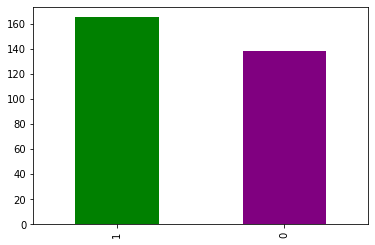

In [6]:
heart_disease['target'].value_counts().plot(kind='bar', color=['green', 'purple']);

In [7]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Compare diff columns to each other so we can see how the data relates with the target variable

**Always refer back to data dictionary so you can know the terminology of the data**

**Heart_disease frequency rate in relationship to sex**
 

In [10]:
heart_disease['sex']. value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#another way to do value count
heart_disease.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column to sex column. you calculate using %
pd.crosstab(heart_disease['target'], heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


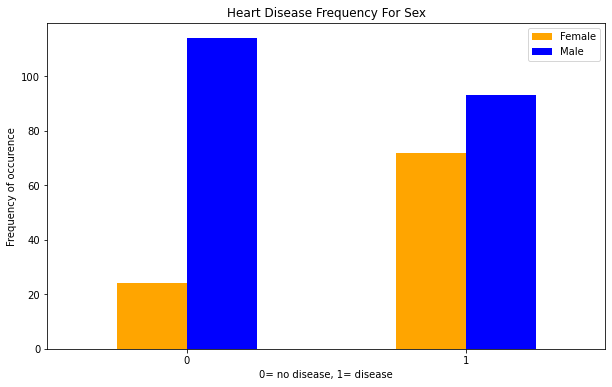

In [13]:
#create a plot of crosstab
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind='bar', figsize= (10,6), color= ['orange', 'blue'],
            title= 'Heart Disease Frequency For Sex', xlabel= '0= no disease, 1= disease', ylabel= 'Frequency of occurence');
plt.legend(['Female', 'Male'])
#to rotate the x-axis
plt.xticks(rotation=0);

## Heart disease in relation to chest pain

In [14]:
pd.crosstab(heart_disease.target, heart_disease.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


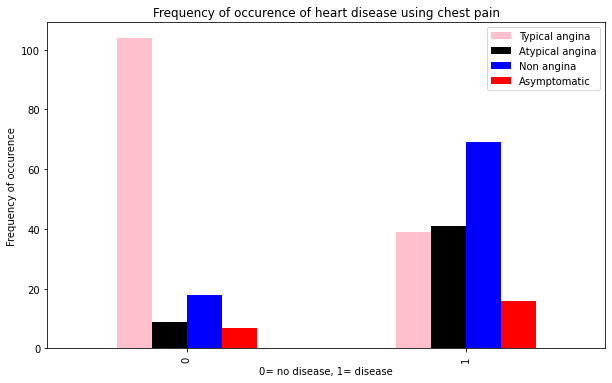

In [15]:
pd.crosstab(heart_disease.target, heart_disease.cp).plot(kind='bar', figsize= (10,6), color=['pink', 'black','blue', 'red'])
plt.title('Frequency of occurence of heart disease using chest pain')
plt.xlabel('0= no disease, 1= disease')
plt.ylabel('Frequency of occurence')
plt.legend(['Typical angina', 'Atypical angina', 'Non angina', 'Asymptomatic']);
                                                         

In [16]:
## combine plenty of independent variable and compare them with target
heart_disease.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [17]:
heart_disease.oldpeak.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age vs Thalach vs Oldpeak for Heart Disease
Because of the wide range of class we use scatter plot for this

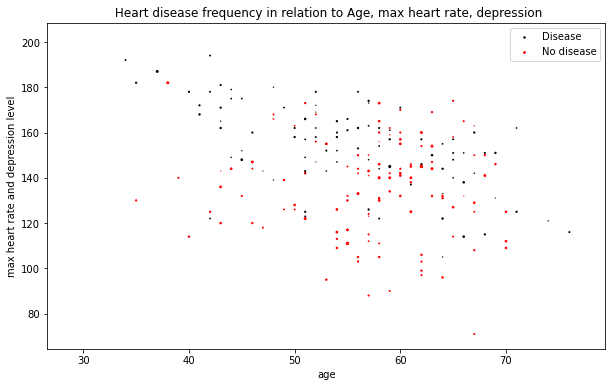

In [19]:
plt.figure(figsize= (10, 6))
#plotting only data that have heart disease
plt.scatter(heart_disease.age[heart_disease.target==1],
           heart_disease.thalach[heart_disease.target==1],
           heart_disease.oldpeak[heart_disease.target==1],
           c= 'black')

#scatter with no disease
plt.scatter(heart_disease.age[heart_disease.target==0],
           heart_disease.thalach[heart_disease.target==0],
           heart_disease.oldpeak[heart_disease.target==0],
           c= 'red')
plt.title(' Heart disease frequency in relation to Age, max heart rate, depression')
plt.xlabel ('age')
plt.ylabel('max heart rate and depression level')
plt.legend(['Disease', 'No disease']);

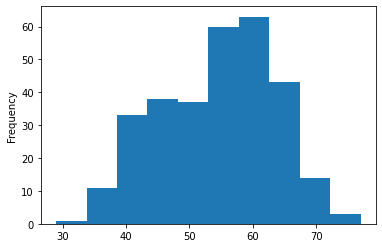

In [20]:
# because everything is all jumbled up, we need ml model to decipher it for us
#check distribution/ spread of the data
heart_disease.age.plot.hist();

## Make a correlation matrix
A coerelation matrix shows how the columns relate with each other


In [21]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


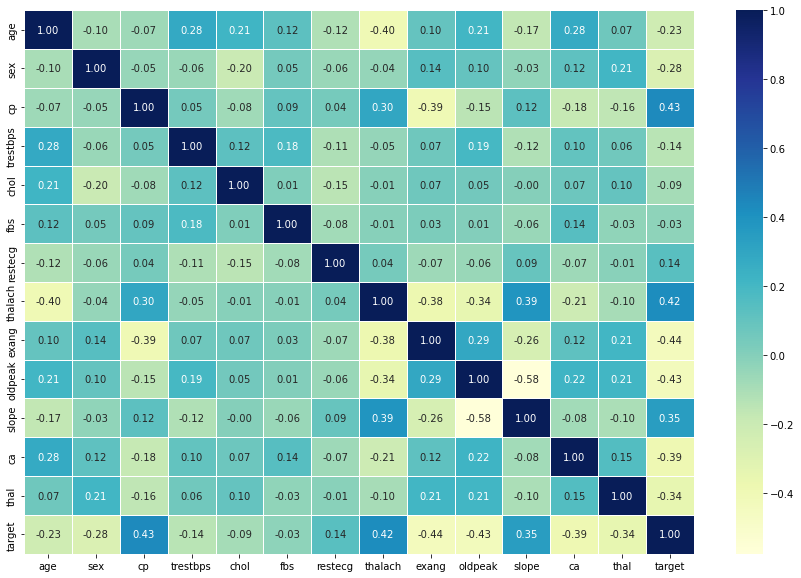

In [22]:
# make correlation table more visual
correlation_matrix= heart_disease.corr()
fig, ax= plt.subplots(figsize= (15,10))
ax= sns.heatmap(correlation_matrix, annot= True, linewidth= 0.7, fmt= '.2f', cmap= 'YlGnBu' );

In [23]:
heart_disease.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

## Modelling

In [24]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# split the data into feature and target variable
X= heart_disease.drop('target', axis=1)
y= heart_disease['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
#split data into train and test set
np.random.seed(42)
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

 we are going to try out 3 diff machine learning model
 
    1. Logistic regression
    2. Random Forest Classifier
    3. kNearestneighbor
    
    because we are using 3 diff models, we put it in a dictionary

In [30]:
#put models in a dictionary
models= {'Logistic Regression':LogisticRegression(),
        'KNN': KNeighborsClassifier(),
         'Random Forest Classification': RandomForestClassifier()}

#create a function fit and score models
def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict of different sklearn ml models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)
    #make a dict to keep model score
    model_score= {}
    #loop through models name= key, model= value
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train, y_train)
        #evaluate the model and append its score to model_scores
        model_score[name]= model.score(X_test, y_test)
    return model_score

In [31]:
model_scores= fit_and_score(models, X_train,X_test,y_train,y_test)
model_scores

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classification': 0.8360655737704918}

## comparing model via visualization

In [32]:
model_compare= pd.DataFrame(model_scores, index= ['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest Classification
accuracy,0.885246,0.688525,0.836066


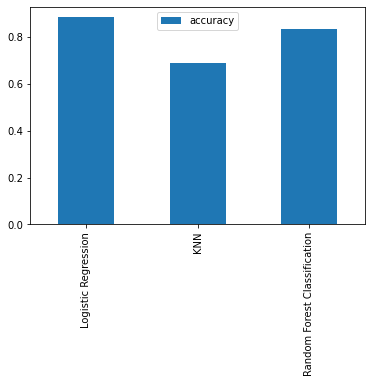

In [33]:
model_compare.T.plot.bar();

Now we have a baseline model and we know the model first prediction are not always what we should based our next steps off. what we do?

what should we do?
1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. Cross validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC Curve
10. AUC

## Hyperparameter tuning of knn by hand

In [34]:
# Lets tune knn by hand
train_scores= []
test_scores= []

# create a list of diff values for n_neigbour (a parameter in knn)
neighbors= range(1,21)

#setup knn instance
knn= KNeighborsClassifier()

#loop through dii n_neighbors
for item in neighbors:
    knn.set_params(n_neighbors= item)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # update training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # update the test score list
    test_scores.append(knn.score(X_test,y_test))
    

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data set: 75.41%


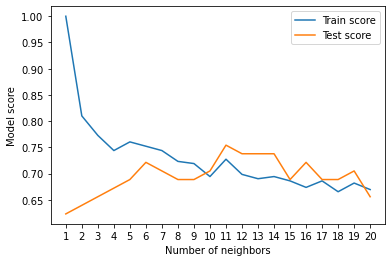

In [37]:
plt.plot(neighbors, train_scores, label= 'Train score')
plt.plot (neighbors, test_scores, label= 'Test score')
plt.legend()
plt.xlabel ('Number of neighbors')
plt.ylabel('Model score') 
plt.xticks(np.arange(1,21,1))
print(f'Maximum KNN score on test data set: {max(test_scores)*100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

we are going to tune:
* Logistic regression
* random forest classifier

using randomized search cv

In [38]:
#create a hyperparameter grid for logistic regression
logistic_grid= {'C':np.logspace(-4,4,20),
      'solver': ['liblinear']}

#create a hyperparameter grid for random forest classifier
random_forest= {'n_estimators': np.arange(10,1000,50),
               'max_depth':[None, 3,5,10],
               'min_samples_split':np.arange(2,20,2),
               'min_samples_leaf':np.arange(1,20,2)}

lets tune now since we haave hyperparameters set up

In [39]:
#tune logistic regression
np.random.seed(42)
#set random search for log reg
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions= logistic_grid,
                               cv=5,
                               n_iter= 20,
                               verbose= True)

#fit random hyperparams search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

 Lets tune Random forest

In [42]:
np.random.seed(42)
random_seed= RandomizedSearchCV(estimator= RandomForestClassifier(),
                               param_distributions= random_forest,
                               cv=5,
                               n_iter= 20,
                               verbose= True)

random_seed.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
random_seed.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
random_seed.score(X_test, y_test)

0.8688524590163934

Looking at the best score of the model, the best model is Logistic Regression so we are going to tune it again to see if we can get more improvemment

## Hyperparameter tuning with GridsearchCv

Looking at the best score of the model, the best model is Logistic Regression so we are going to tune it again to see if we can get more improvemment

In [45]:
# Different hyperparameter for Logistic regression

log_reg_grid= {'C': np.logspace(-4, 4, 30), 
               'solver': ['liblinear']}

#setup diff hyperparams for logistic regression
gs_log_reg= GridSearchCV(estimator= LogisticRegression(),
                        param_grid= log_reg_grid,
                        cv= 5,
                        verbose= True)

#fit the grid hyperparam to our model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
#check the best hyperparam
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
#evaluate the data
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned ml classifier beyond accuracy
* ROC and AUC curve
* Cpnfusion matrix
* Classification report
* Precision
* Recall
* F1-score

use Cross validation where possible

In [48]:
# make prediction with tuned model
gs_log_reg

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
y_preds= gs_log_reg.predict(X_test)

In [50]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

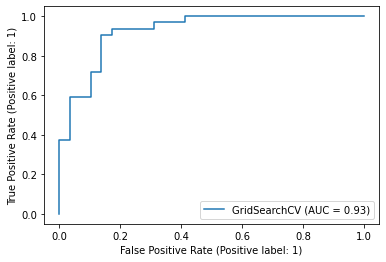

In [52]:
# plot Roc curve and calc AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [53]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

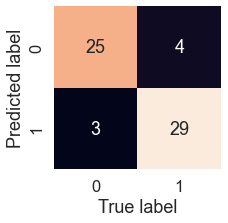

In [54]:
# visualize confusion matrix using seabon
sns.set(font_scale= 1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax= plt.subplots(figsize= (3,3))
    ax = sns.heatmap (confusion_matrix(y_test, y_preds), annot= True,
                    cbar= False)
    ax.set(xlabel= 'True label', ylabel= 'Predicted label' )
    
plot_conf_mat(y_test, y_preds)

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Because classification report only calculate only one train test split, we use cross val to calc evaluation metrics, i.e precission, f1 and recall

In [56]:
#set up a new logistic regression using our best hyper params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
# create a new classifier with the best params 
clf= LogisticRegression(C= 0.20433, solver= 'liblinear')

In [58]:
#cross val precision
a= cross_val_score(clf, X, y, scoring= 'precision')
a

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [59]:
a=np.mean(a)
a

0.8215873015873015

In [60]:
#cross val accuracy
b= cross_val_score(clf, X, y, scoring= 'accuracy')
b=np.mean(b)
b

0.8479781420765027

In [61]:
# cross val f1
c= cross_val_score(clf, X, y, scoring= 'f1')
c= np.mean(c)
c

0.8705403543192143

In [62]:
d= cross_val_score(clf, X, y, scoring= 'recall')
d= np.mean(d)
d

0.9272727272727274

In [65]:
#visualize cross val metrics
cv_metrics= pd.DataFrame({'Accuracy':b,
                         'Precision':a,
                         'F1_score':c,
                         'Recall':d},
                        index= [0])
cv_metrics

,Accuracy,Precision,F1_score,Recall
0,0.847978,0.821587,0.87054,0.927273


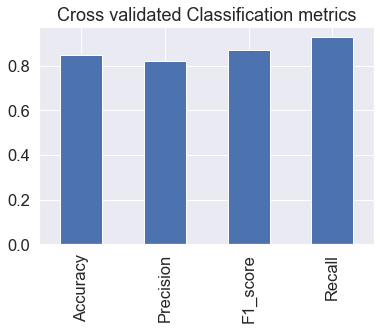

In [67]:
cv_metrics.T.plot.bar(title= 'Cross validated Classification metrics',
                      legend= False);

## Feature importance

finding feature importance is diff for each ml module

In [68]:
#fit an instance of Logistic regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
clf= LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
#fit the data
clf.fit(X_train, y_train);

In [73]:
#check the coefficient
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [74]:
#match coef of features to colums
feature_dict= dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [75]:
# visualize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


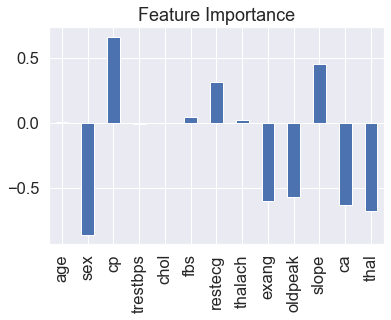

In [77]:
feature_df.T.plot(kind= 'bar', title='Feature Importance', legend= False);

## Reviewing our models

if you havent reach your evaluation metric yet, ask yourself....or go to your client
* can you collect more sample/data
* use a better model like catboost or xgboost
* can you improve the current model (beyond what you have done)


if you have reach your evaluation metric.
* save and share your model with others
